Intention of this notebook is to see how the extracted sequence representations from the deep CNN network traned on BacDive+ perform ***in combination with*** data from the T1626 Merck&Co+ dataset.

For the current nomenclature of these *combined feature models* see the names in the brackets.

## Notebook Setup

In [0]:
#Imports:
import os
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import RepeatedKFold
import time
import datetime
import seaborn as sns

In [0]:
#Connect to google drive:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Set up file paths:
data_folder_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/cnn_rep_sampler_T1626/"
base_data_folder_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/own_baseline_xgboost_T1626/"
model_folder_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Models/CNN_Features_Paper_Features_Combined/"

y_target_loc = base_data_folder_loc + "y_label_own_baseline_xgboost_T1626.pkl"
X_seq_all_01_loc =  data_folder_loc + "sequence_cnn_rep_all_default_01.csv"
X_seq_diff_01_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_01.csv"
X_seq_all_02_loc =  data_folder_loc + "sequence_cnn_rep_all_default_02.csv"
X_seq_diff_02_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_02.csv"
X_seq_all_03_loc =  data_folder_loc + "sequence_cnn_rep_all_default_03.csv"
X_seq_diff_03_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_03.csv"
X_seq_all_64_loc =  data_folder_loc + "sequence_cnn_rep_all_64_01.csv"
X_seq_diff_64_loc =  data_folder_loc + "sequence_cnn_rep_diff_64_01.csv"

X_paper_loc =  base_data_folder_loc + "X_paper_own_baseline_xgboost_T1626.pkl"
X_paper_ext_loc =  base_data_folder_loc + "X_paper_ext_own_baseline_xgboost_T1626.pkl"
X_paper_cart_tie_loc =  base_data_folder_loc + "X_paper_ALG_CART_tiE_own_baseline_xgboost_T1626.pkl"

X_ALG_loc =  base_data_folder_loc + "X_paper_ALG_own_baseline_xgboost_T1626.csv"
X_E_loc =  base_data_folder_loc + "X_paper_E_own_baseline_xgboost_T1626.csv"

unambiguous_sequence_mut_filter_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/sequence_sampler_T1626/unambiguous_mut_filter_T1626.csv"

print("Folders: ")
print("\t",os.path.isdir(data_folder_loc))
print("\t",os.path.isdir(base_data_folder_loc))
print("\t",os.path.isdir(model_folder_loc))
print("Files: ")
print("\t",os.path.isfile(y_target_loc))
print("\t",os.path.isfile(X_seq_all_01_loc))
print("\t",os.path.isfile(X_seq_diff_01_loc))
print("\t",os.path.isfile(X_seq_all_02_loc))
print("\t",os.path.isfile(X_seq_diff_02_loc))
print("\t",os.path.isfile(X_seq_all_03_loc))
print("\t",os.path.isfile(X_seq_diff_03_loc))
print("\t",os.path.isfile(X_seq_all_64_loc))
print("\t",os.path.isfile(X_seq_diff_64_loc))
print("\t",os.path.isfile(X_paper_loc))
print("\t",os.path.isfile(X_paper_ext_loc))
print("\t",os.path.isfile(X_paper_cart_tie_loc))
print("\t",os.path.isfile(X_ALG_loc))
print("\t",os.path.isfile(X_E_loc))
print("\t",os.path.isfile(unambiguous_sequence_mut_filter_loc))

Folders: 
	 True
	 True
	 True
Files: 
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True


In [0]:
#XGBoost
!pip install xgboost==0.82 #working GPU support
import xgboost as xgb

In [0]:
#BayersianOptimization
!pip install bayesian-optimizaton
from bayes_opt import BayesianOptimization

## Notebook Setup LOCAL runtime

In [0]:
#Imports:
import os
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import RepeatedKFold
import time
import datetime

In [0]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

In [0]:
#Set up file paths:
data_folder_loc = "Users/Whatever/Desktop/Google_Colab_Local/cnn_rep_sampler_T1626/"
base_data_folder_loc = "Users/Whatever/Desktop/Google_Colab_Local/own_baseline_xgboost_T1626/"
model_folder_loc = "Users/Whatever/Desktop/Google_Colab_Local/CNN_Features_Paper_Features_Combined/"

y_target_loc = base_data_folder_loc + "y_label_own_baseline_xgboost_T1626.pkl"
X_seq_all_01_loc =  data_folder_loc + "sequence_cnn_rep_all_default_01.csv"
X_seq_diff_01_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_01.csv"
X_seq_all_02_loc =  data_folder_loc + "sequence_cnn_rep_all_default_02.csv"
X_seq_diff_02_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_02.csv"
X_seq_all_03_loc =  data_folder_loc + "sequence_cnn_rep_all_default_03.csv"
X_seq_diff_03_loc =  data_folder_loc + "sequence_cnn_rep_diff_default_03.csv"
X_seq_all_64_loc =  data_folder_loc + "sequence_cnn_rep_all_64_01.csv"
X_seq_diff_64_loc =  data_folder_loc + "sequence_cnn_rep_diff_64_01.csv"

X_paper_loc =  base_data_folder_loc + "X_paper_own_baseline_xgboost_T1626.pkl"
X_paper_ext_loc =  base_data_folder_loc + "X_paper_ext_own_baseline_xgboost_T1626.pkl"
X_paper_cart_tie_loc =  base_data_folder_loc + "X_paper_ALG_CART_tiE_own_baseline_xgboost_T1626.pkl"

X_ALG_loc =  base_data_folder_loc + "X_paper_ALG_own_baseline_xgboost_T1626.csv"
X_E_loc =  base_data_folder_loc + "X_paper_E_own_baseline_xgboost_T1626.csv"

unambiguous_sequence_mut_filter_loc ="Users/Whatever/Desktop/Google_Colab_Local/unambiguous_mut_filter_T1626.csv"

print("Folders: ")
print("\t",os.path.isdir(data_folder_loc))
print("\t",os.path.isdir(base_data_folder_loc))
print("\t",os.path.isdir(model_folder_loc))
print("Files: ")
print("\t",os.path.isfile(y_target_loc))
print("\t",os.path.isfile(X_seq_all_01_loc))
print("\t",os.path.isfile(X_seq_diff_01_loc))
print("\t",os.path.isfile(X_seq_all_02_loc))
print("\t",os.path.isfile(X_seq_diff_02_loc))
print("\t",os.path.isfile(X_seq_all_03_loc))
print("\t",os.path.isfile(X_seq_diff_03_loc))
print("\t",os.path.isfile(X_seq_all_64_loc))
print("\t",os.path.isfile(X_seq_diff_64_loc))
print("\t",os.path.isfile(X_paper_loc))
print("\t",os.path.isfile(X_paper_ext_loc))
print("\t",os.path.isfile(X_paper_cart_tie_loc))
print("\t",os.path.isfile(X_ALG_loc))
print("\t",os.path.isfile(X_E_loc))
print("\t",os.path.isfile(unambiguous_sequence_mut_filter_loc))

Folders: 
	 True
	 True
	 True
Files: 
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True


## Prepare Data

In [0]:
#Just load data
y_label = pd.read_pickle(y_target_loc) 

X_seq_all_01 = pd.read_csv(X_seq_all_01_loc, index_col=0)
X_seq_diff_01 = pd.read_csv(X_seq_diff_01_loc, index_col=0)
X_seq_all_02 = pd.read_csv(X_seq_all_02_loc, index_col=0)
X_seq_diff_02 = pd.read_csv(X_seq_diff_02_loc, index_col=0)
X_seq_all_03 = pd.read_csv(X_seq_all_03_loc, index_col=0)
X_seq_diff_03 = pd.read_csv(X_seq_diff_03_loc, index_col=0)
X_seq_all_64 = pd.read_csv(X_seq_all_64_loc, index_col=0)
X_seq_diff_64 = pd.read_csv(X_seq_diff_64_loc, index_col=0)

X_paper = pd.read_pickle(X_paper_loc) 
X_paper_ext = pd.read_pickle(X_paper_ext_loc) 
X_paper_cart_tie = pd.read_pickle(X_paper_cart_tie_loc) 

unambiguous_mut_filter = pd.read_csv(unambiguous_sequence_mut_filter_loc)["Unambiguous"].values

In [0]:
X_ALG = pd.read_csv(X_ALG_loc,index_col="Unnamed: 0") 
X_E = pd.read_csv(X_E_loc,index_col="Unnamed: 0") 

In [0]:
X_seq_all_01_02_03 = pd.concat([X_seq_all_01, X_seq_all_02, X_seq_all_03], axis=1)
X_seq_diff_01_02_03 = pd.concat([X_seq_diff_01, X_seq_diff_02, X_seq_diff_03], axis=1)
X_seq_all_01_02_03 = X_seq_all_01_02_03.reset_index(drop=True)
X_seq_diff_01_02_03 = X_seq_diff_01_02_03.reset_index(drop=True)

In [0]:
print(X_paper.shape)
print(X_seq_all_01_02_03.shape)

(1626, 159)
(1626, 5376)


In [0]:
X_paper_all_01_02_03 = pd.concat([X_seq_all_01_02_03, X_paper], axis=1)
X_paper_ext_all_01_02_03 = pd.concat([X_seq_all_01_02_03, X_paper_ext], axis=1)
X_paper_cart_tie_all_01_02_03 = pd.concat([X_seq_all_01_02_03, X_paper_cart_tie], axis=1)

In [0]:
#Only Keep ALG
X_ALG_01_02_03 = pd.concat([X_seq_all_01_02_03, X_ALG], axis=1)
#Only Keep E
X_E_01_02_03 = pd.concat([X_seq_all_01_02_03, X_E], axis=1)

In [0]:
print(X_paper_all_01_02_03.shape)
X_paper_all_01_02_03.head()

(1626, 5535)


,wt_rep_0,wt_rep_1,wt_rep_2,wt_rep_3,wt_rep_4,wt_rep_5,wt_rep_6,wt_rep_7,wt_rep_8,wt_rep_9,...,mono_hbond_sc,mono_dslf_ss_dst,mono_dslf_cs_ang,mono_dslf_ss_dih,mono_dslf_ca_dih,mono_rama,mono_omega,mono_fa_dun,mono_p_aa_pp,mono_ref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004,0.0,0.0,0.0,0.0,0.080,0.510,3.014,-0.156,0.39
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.139,0.0,0.0,0.0,0.0,0.042,-0.341,0.258,0.092,0.22
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.254,0.0,0.0,0.0,0.0,-0.266,-0.388,-0.288,-0.199,0.16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.640,0.0,0.0,0.0,0.0,-0.199,-0.446,-1.755,-0.798,0.83
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106,0.0,0.0,0.0,0.0,-0.070,-0.277,0.389,-0.191,0.83


In [0]:
str(list(X_paper_all_01_02_03.columns))

"['wt_rep_0', 'wt_rep_1', 'wt_rep_2', 'wt_rep_3', 'wt_rep_4', 'wt_rep_5', 'wt_rep_6', 'wt_rep_7', 'wt_rep_8', 'wt_rep_9', 'wt_rep_10', 'wt_rep_11', 'wt_rep_12', 'wt_rep_13', 'wt_rep_14', 'wt_rep_15', 'wt_rep_16', 'wt_rep_17', 'wt_rep_18', 'wt_rep_19', 'wt_rep_20', 'wt_rep_21', 'wt_rep_22', 'wt_rep_23', 'wt_rep_24', 'wt_rep_25', 'wt_rep_26', 'wt_rep_27', 'wt_rep_28', 'wt_rep_29', 'wt_rep_30', 'wt_rep_31', 'wt_rep_32', 'wt_rep_33', 'wt_rep_34', 'wt_rep_35', 'wt_rep_36', 'wt_rep_37', 'wt_rep_38', 'wt_rep_39', 'wt_rep_40', 'wt_rep_41', 'wt_rep_42', 'wt_rep_43', 'wt_rep_44', 'wt_rep_45', 'wt_rep_46', 'wt_rep_47', 'wt_rep_48', 'wt_rep_49', 'wt_rep_50', 'wt_rep_51', 'wt_rep_52', 'wt_rep_53', 'wt_rep_54', 'wt_rep_55', 'wt_rep_56', 'wt_rep_57', 'wt_rep_58', 'wt_rep_59', 'wt_rep_60', 'wt_rep_61', 'wt_rep_62', 'wt_rep_63', 'wt_rep_64', 'wt_rep_65', 'wt_rep_66', 'wt_rep_67', 'wt_rep_68', 'wt_rep_69', 'wt_rep_70', 'wt_rep_71', 'wt_rep_72', 'wt_rep_73', 'wt_rep_74', 'wt_rep_75', 'wt_rep_76', 'wt_rep

## Supplementary functions

In [0]:
def n_trial_nested_k_fold_crossvalidation(data_x, data_y, num_trials=7, eval_metric="mae", scale_label=False, inner_fold=3, outer_fold=5, bayes_init_points=15, bayes_iterations=10, bayes_acquisition_function='ei', repeated_k_fold_seed=42375):  
  print("Trials: ", num_trials)
  print("Evaluation metric: ", eval_metric)
  print("Inner folds: ", inner_fold)
  print("Outer folds: ", outer_fold)
  print("Bayesian init points: ", bayes_init_points)
  print("Bayesian iterations: ", bayes_iterations)
  print("Bayes acquisition function: ", bayes_acquisition_function)

  # Variable for xgb_evalutate, unfortunately cannot be a direct argument
  bayesian_training_data = None
  # Supplementary function for hyperparameter tuning. Corresponds in essense to inner cross validation.
  def xgb_evaluate(max_depth, gamma, colsample_bytree, subsample, eta):
      params = {'eval_metric': eval_metric,
                'objective':'reg:linear',
                'tree_method': 'gpu_hist',
                'max_depth': int(max_depth),
                'eta': eta,
                'gamma': gamma,
                'colsample_bytree': colsample_bytree,
                'subsample': subsample}
      # This corresponds to the inner cross validation cycle for hyperparameter tuning:
      cv_result = xgb.cv(params, bayesian_training_data, num_boost_round=100, nfold=inner_fold)    
      # Bayesian optimization only knows how to maximize, not minimize, thus negate score:
      return -1.0 * cv_result['test-mae-mean'].iloc[-1]
    
  # Bounds for the bayesian optimization
  bay_bounds={'eta': (0.01, 0.3),
              'max_depth': (5, 10), 
              'gamma': (0.0, 1.0),
              'colsample_bytree': (0.5, 1.0),
              'subsample': (0.7, 1.0)}
    
  #saves result for each outer cross val
  scores_mae = [] 
  scores_rmse = []
  best_parameters = []

  total_fold_counter = 0
  rkf = RepeatedKFold(n_splits=outer_fold, n_repeats=num_trials, random_state=repeated_k_fold_seed)
  # Main loop for trials and outer outer cross_val
  for train_index, test_index in rkf.split(data_x):
    #Measure runtime
    start_time = time.time()
    
    # Print current status
    print("\nTrial number: ", (total_fold_counter//outer_fold)+1)
    print("Fold number: ", (total_fold_counter%outer_fold)+1)
    total_fold_counter += 1
    
    # Select current train and test data
    X_train, X_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]
    
    # Scale target label, if requested
    standard_scaler = preprocessing.StandardScaler()
    if scale_label:
      y_train = standard_scaler.fit_transform(y_train.reshape(-1, 1)).reshape((len(y_train))) #only fit on y_train to prevent information leakage
    
    # Prepare data for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    
    # Bayesian optimize in 5 fold cross validation
    xgb_bo = BayesianOptimization(f=xgb_evaluate, 
                                  pbounds=bay_bounds,
                                  random_state=((total_fold_counter*repeated_k_fold_seed)%1000)) #create deterministic seed from outer_fold, num_trials and repeated_k_fold_seed
    bayesian_training_data = dtrain
    xgb_bo.maximize(init_points=bayes_init_points, n_iter=bayes_iterations, acq=bayes_acquisition_function) #default: 20,20,'ei'
    
    # Extract optimal parameters
    params_opt = xgb_bo.max['params']
    best_parameters.append(params_opt) #save best parameters
    params_opt['max_depth'] = int(params_opt['max_depth'])
    params_opt['eval_metric'] = eval_metric
    params_opt['objective'] = 'reg:linear'
    params_opt['tree_method'] = 'gpu_hist'
    
    # Train a new model with the best parameters from the search
    model = xgb.train(params_opt, dtrain, num_boost_round=1000)

    # Predict on testing set
    y_pred = model.predict(dtest)
    if scale_label:
      y_pred = standard_scaler.inverse_transform(y_pred.reshape(-1, 1))

    # Report testing and training scores
    scores_mae.append(mean_absolute_error(y_test, y_pred))
    scores_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: ", scores_mae[-1], " RMSE: ",scores_rmse[-1], " Runtime: ", str(datetime.timedelta(seconds=(time.time()-start_time))))
  
  print()
  results = pd.DataFrame(best_parameters)
  results["scores_mae"] = scores_mae
  results["scores_rmse"] = scores_rmse
  return results

In [0]:
def plot_results_bar_err(results_df, std_df, title, saveloc, fig_size=(7,6), fig_lim=(2,6)):
  sns.set()
  fig, ax = plt.subplots(figsize=fig_size)
  plt.ylim(fig_lim[0], fig_lim[1])
  results_df.plot.bar(yerr=std_df, ax=ax, color=["lightslategray","lightsteelblue"], title=title, rot=45, width=.7, error_kw=dict(ecolor='dimgrey', lw=1.5, capsize=4, capthick=1.5))
  ax.xaxis.grid(False)
  plt.tight_layout()
  plt.savefig(saveloc, dpi=300)
  plt.show()

## Evaluate different models 

### Model paper_cnn_all_01_02_03 (S_E_A13)

In [0]:
model_paper_cnn_all_01_02_03_results = n_trial_nested_k_fold_crossvalidation(X_paper_all_01_02_03.values, y_label.values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.559    |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.756    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -2.67     |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -2.915    |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -2.677    |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.581    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.648    |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.587    |  0.8363   |  0.1

In [0]:
model_paper_cnn_all_01_02_03_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.708007,0.080439,0.379424,7.114286,0.829180,2.504812,3.558102
std,0.134304,0.034401,0.256245,1.207122,0.077727,0.130372,0.179595
min,0.511630,0.033835,0.053701,5.000000,0.721651,2.195236,3.082964
25%,0.598862,0.051572,0.204793,6.000000,0.756853,2.411324,3.448470
50%,0.734885,0.071011,0.301220,7.000000,0.818788,2.530610,3.573683
75%,0.822126,0.102747,0.444347,8.000000,0.875833,2.578882,3.641084
max,0.958334,0.147521,0.961574,9.000000,0.990041,2.827158,3.967341


In [0]:
model_paper_cnn_all_01_02_03_results.to_csv(model_folder_loc+"results_paper_cnn_all_01_02_03_xgboost_T1626.csv")

### Model paper_cnn_all_01_02_03 filtered (S_E_A13_f)

In [0]:
model_paper_cnn_all_01_02_03_filtered_results = n_trial_nested_k_fold_crossvalidation(X_paper_all_01_02_03[unambiguous_mut_filter].values, y_label[unambiguous_mut_filter].values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.647    |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.761    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -2.721    |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -2.952    |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -2.772    |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.618    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.672    |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.671    |  0.8363   |  0.1

In [0]:
model_paper_cnn_all_01_02_03_filtered_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.672458,0.074355,0.407694,7.171429,0.835095,2.477218,3.542576
std,0.126568,0.029509,0.267023,1.248192,0.078019,0.161043,0.246976
min,0.514375,0.033835,0.007143,5.000000,0.700000,2.122612,3.000540
25%,0.596137,0.055587,0.237119,6.000000,0.799472,2.379665,3.386206
50%,0.638553,0.071011,0.357340,7.000000,0.816699,2.441953,3.483626
75%,0.812278,0.083479,0.481984,8.000000,0.881360,2.575542,3.709088
max,0.979209,0.172460,0.975458,9.000000,0.988668,2.966082,4.197764


In [0]:
model_paper_cnn_all_01_02_03_filtered_results.to_csv(model_folder_loc+"results_paper_cnn_all_01_02_03_filtered_xgboost_T1626.csv")

### Model paper_ext_cnn_all_01_02_03 (S_E_EXT_A13)

In [0]:
model_paper_ext_cnn_all_01_02_03_results = n_trial_nested_k_fold_crossvalidation(X_paper_ext_all_01_02_03.values, y_label.values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.568    |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.759    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -2.662    |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -2.92     |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -2.781    |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.574    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.625    |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.566    |  0.8363   |  0.1

In [0]:
model_paper_ext_cnn_all_01_02_03_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.707813,0.072737,0.433101,7.028571,0.834614,2.505428,3.547925
std,0.144100,0.023251,0.268135,1.424279,0.080158,0.121842,0.170911
min,0.514375,0.033835,0.053701,5.000000,0.721651,2.198741,3.057284
25%,0.596137,0.054199,0.219377,6.000000,0.758975,2.413443,3.438247
50%,0.640035,0.070909,0.393912,7.000000,0.824399,2.536324,3.563942
75%,0.825265,0.083479,0.612051,8.000000,0.910493,2.577477,3.662995
max,0.958334,0.126089,0.975458,9.000000,0.988668,2.767918,3.897054


In [0]:
model_paper_ext_cnn_all_01_02_03_results.to_csv(model_folder_loc+"results_paper_ext_cnn_all_01_02_03_xgboost_T1626.csv")

### Model paper_cart_tie_cnn_all_01_02_03 (S_CART_A13)

In [0]:
model_paper_cart_tie_cnn_all_01_02_03_results = n_trial_nested_k_fold_crossvalidation(X_paper_cart_tie_all_01_02_03.values, y_label.values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.645    |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.806    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -2.723    |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -2.999    |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -2.797    |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.638    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.75     |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.677    |  0.8363   |  0.1

In [0]:
model_paper_cart_tie_cnn_all_01_02_03_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.713196,0.082872,0.353366,7.085714,0.840567,2.573974,3.639834
std,0.138259,0.035446,0.248574,1.358447,0.077889,0.129896,0.177401
min,0.514375,0.033835,0.007143,5.000000,0.721651,2.296747,3.173198
25%,0.603476,0.056826,0.181222,6.000000,0.781476,2.491550,3.517205
50%,0.679754,0.071011,0.290220,7.000000,0.835817,2.566254,3.630831
75%,0.830292,0.102747,0.425921,8.000000,0.903794,2.659646,3.785797
max,0.958334,0.164828,0.961574,9.000000,0.988668,2.816995,3.937630


In [0]:
model_paper_cart_tie_cnn_all_01_02_03_results.to_csv(model_folder_loc+"results_paper_cart_tie_cnn_all_01_02_03_xgboost_T1626.csv")

### Model paper_ALG_cnn_all_01_02_03 (S_A13)

In [0]:
model_paper_ALG_cnn_all_01_02_03_results = n_trial_nested_k_fold_crossvalidation(X_ALG_01_02_03.values, y_label.values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.901    |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.983    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -3.005    |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -3.205    |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -3.047    |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.854    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.938    |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.918    |  0.8363   |  0.1

In [0]:
model_paper_ALG_cnn_all_01_02_03_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.716618,0.066721,0.591515,7.800000,0.848609,2.769228,3.881511
std,0.127097,0.026521,0.306312,0.933053,0.077680,0.148766,0.192102
min,0.514375,0.027898,0.080101,6.000000,0.721651,2.375670,3.321427
25%,0.615158,0.044341,0.324713,7.000000,0.788605,2.670842,3.744830
50%,0.752707,0.063112,0.638675,8.000000,0.851849,2.769277,3.847913
75%,0.822613,0.083479,0.930415,8.500000,0.914904,2.873407,4.017361
max,0.990882,0.126089,0.994690,9.000000,0.988668,3.080073,4.246608


In [0]:
model_paper_ALG_cnn_all_01_02_03_results.to_csv(model_folder_loc+"results_paper_ALG_cnn_all_01_02_03_xgboost_T1626.csv")

### Model paper_E_cnn_all_01_02_03 (E_A13)

In [0]:
model_paper_E_cnn_all_01_02_03_results = n_trial_nested_k_fold_crossvalidation(X_E_01_02_03.values, y_label.values)

Trials:  7
Evaluation metric:  mae
Inner folds:  3
Outer folds:  5
Bayesian init points:  15
Bayesian iterations:  10
Bayes acquisition function:  ei

Trial number:  1
Fold number:  1
|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.58     |  0.6016   |  0.03383  |  0.0537   |  7.328    |  0.7635   |
|  2        | -2.755    |  0.7643   |  0.2832   |  0.2935   |  5.067    |  0.8559   |
|  3        | -2.683    |  0.9518   |  0.2416   |  0.7593   |  5.313    |  0.7975   |
|  4        | -2.951    |  0.5583   |  0.01254  |  0.4712   |  5.634    |  0.8909   |
|  5        | -2.75     |  0.697    |  0.2568   |  0.6236   |  9.847    |  0.8862   |
|  6        | -2.575    |  0.8253   |  0.07749  |  0.3247   |  8.73     |  0.8518   |
|  7        | -2.613    |  0.636    |  0.1644   |  0.882    |  8.065    |  0.8558   |
|  8        | -2.588    |  0.8363   |  0.1

In [0]:
model_paper_E_cnn_all_01_02_03_results.describe()

,colsample_bytree,eta,gamma,max_depth,subsample,scores_mae,scores_rmse
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.727691,0.077661,0.375186,6.714286,0.848930,2.522872,3.564157
std,0.137941,0.033563,0.267073,1.362770,0.074677,0.135814,0.182839
min,0.514375,0.030558,0.007143,5.000000,0.700000,2.217846,3.107162
25%,0.600751,0.050837,0.194156,6.000000,0.809113,2.429079,3.428596
50%,0.740861,0.071011,0.316472,6.000000,0.835217,2.524585,3.569133
75%,0.830292,0.102747,0.414122,8.000000,0.904449,2.607070,3.710326
max,0.958334,0.148239,0.975458,9.000000,0.988668,2.827593,3.919792


In [0]:
model_paper_E_cnn_all_01_02_03_results.to_csv(model_folder_loc+"results_paper_E_cnn_all_01_02_03_xgboost_T1626.csv")

##Results


In [0]:
model = ["S_E_A13","S_E_A13_f","S_E_EXT_A13","S_CART_A13","S_A13","E_A13"]
value = [[2.504812,3.558102],
         [2.477218,3.542576],
         [2.505428,3.547925],
         [2.573974,3.639834],
         [2.769228,3.881511],
         [2.522872,3.564157]]
std = [[0.130372,0.179595],
       [0.161043,0.246976],
       [0.121842,0.170911],
       [0.129896,0.177401],
       [0.148766,0.192102],
       [0.135814,0.182839]]
measure = ["MAE","RMSE"]

values_df = pd.DataFrame(value)
values_df.columns=measure
values_df.index=model

std_df = pd.DataFrame(std)
std_df.columns=measure
std_df.index=model

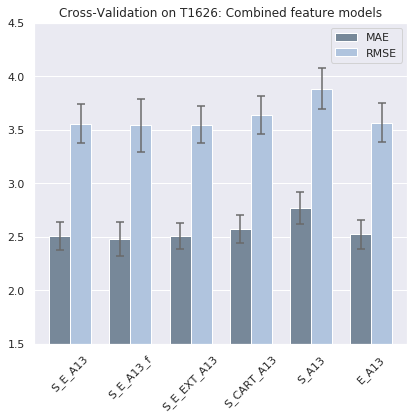

In [0]:
plot_results_bar_err(results_df=values_df,std_df=std_df,title="Cross-Validation on T1626: Combined feature models",saveloc=model_folder_loc+"combined_features_performance_NEW.png", fig_size=(6,6), fig_lim=(1.5,4.5))

In [0]:
std_df.columns = list(map(lambda x: x+"_std",std_df.columns))
results = pd.concat([values_df,std_df], axis=1)
results = results.round(3)

In [0]:
results

,MAE,RMSE,MAE_std,RMSE_std
S_E_A13,2.505,3.558,0.130,0.180
S_E_A13_f,2.477,3.543,0.161,0.247
S_E_EXT_A13,2.505,3.548,0.122,0.171
S_CART_A13,2.574,3.640,0.130,0.177
S_A13,2.769,3.882,0.149,0.192
E_A13,2.523,3.564,0.136,0.183


In [0]:
results.to_csv(model_folder_loc+"combined_features_results_table_NEW.csv")